# Table of Contents

>[Introduction](#scrollTo=WJAjUmtVDPhy)
>>[Importing Packages and Dataset](#scrollTo=6bPDSyZmoGl4)<br>

>[Feature Engineering and Data Pre-Processing](#feature)<br>

>[Missing Values](#mis)<br>

>[Exploratory visualizations](#exp)<br>
>>[Correlation matrix](#cor)<br>
>>[Distribution of Actual work time in minutes](#act)<br>
>>[Actual work in Minutes by Plant ID](#plant)<br>
>>[Actual work in Minutes by Functional Location](#loc)<br>
>>[Order Description](#order)<br>

>[Summary](#sum)

## Introduction <a id = 'scrollTo=WJAjUmtVDPhy'></a>

### Importing Packages and Dataset <a id = 'scrollTo=6bPDSyZmoGl4'></a>

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.colors as mcolors
from wordcloud import WordCloud
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

C:\Users\Harish\anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
iwc_data = pd.read_csv('IWC_Work_Orders_Extract.csv')

In [3]:
iwc_data.shape

(1427264, 25)

In [4]:
iwc_data.describe()

,ORDER_ID,ACTUAL_WORK_IN_MINUTES,MAINTENANCE_ITEM,EQUIPMENT_ID
count,1.427264e+06,1.427264e+06,152594.000000,2.917950e+05
mean,4.561470e+10,8.862968e+01,115846.807954,3.002609e+08
std,8.387114e+10,8.037915e+02,71325.255687,5.581645e+06
min,1.000219e+08,0.000000e+00,39801.000000,2.000871e+08
25%,4.022602e+08,1.200000e+01,41046.000000,3.000092e+08
50%,7.044271e+08,4.800000e+01,112995.000000,3.000178e+08
75%,1.002343e+09,9.000000e+01,134702.000000,3.000269e+08
max,9.000001e+11,3.301848e+05,346352.000000,4.000290e+08


## Feature Engineering and Data Pre-Processing <a id = 'feature'></a>

In [5]:
# Convert numeric data to date type data
iwc_data['EXECUTION_START_DATE'] = pd.to_datetime(iwc_data['EXECUTION_START_DATE'])
iwc_data['EXECUTION_FINISH_DATE'] = pd.to_datetime(iwc_data['EXECUTION_FINISH_DATE'])
iwc_data['EQUIP_START_UP_DATE'] = pd.to_datetime(iwc_data['EQUIP_START_UP_DATE'])
iwc_data['EQUIP_VALID_FROM'] = pd.to_datetime(iwc_data['EQUIP_VALID_FROM'])

In [6]:
# Calculate "before functional duration": the time when the machine was acquired to the time when it became functional
iwc_data['B_FUNCTIONAL_DURATION'] =  iwc_data['EQUIP_VALID_FROM'] - iwc_data['EQUIP_START_UP_DATE']

In [7]:
iwc_data.head(10)

,ORDER_ID,PLANT_ID,PRODUCTION_LOCATION,EXECUTION_START_DATE,EXECUTION_FINISH_DATE,ACTUAL_START_TIME,ACTUAL_FINISH_TIME,ACTUAL_WORK_IN_MINUTES,MAINTENANCE_PLAN,MAINTENANCE_ITEM,MAINTENANCE_ACTIVITY_TYPE,ORDER_DESCRIPTION,MAINTENANCE_TYPE_DESCRIPTION,FUNCTIONAL_LOC,FUNCTIONAL_AREA_NODE_1_MODIFIED,FUNCTIONAL_AREA_NODE_2_MODIFIED,FUNCTIONAL_AREA_NODE_3_MODIFIED,FUNCTIONAL_AREA_NODE_4_MODIFIED,FUNCTIONAL_AREA_NODE_5_MODIFIED,EQUIPMENT_ID,EQUIPMENT_DESC,EQUIP_CAT_DESC,EQUIP_START_UP_DATE,EQUIP_VALID_FROM,EQUIP_VALID_TO,B_FUNCTIONAL_DURATION
0,705642457,G812,ROMA,2024-05-04,2024-05-12,06:00:00.000,23:04:08.000,390.0,NaN,NaN,Unplanned,L2 GEARBOX LEAK (SEE ATTACHED),Corrective Maintenance Order,G812-PRD-L15-L03-L030-020,PRODUCTION,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31,-72 days
1,704191697,G812,ROMA,2022-09-13,2022-09-13,06:00:00.000,17:17:24.000,420.0,NaN,NaN,Unplanned,LINE 3 CONVEYOR AT CAN CODER,Corrective Maintenance Order,G812-PRD-L15-L03-L030-020,PRODUCTION,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31,-72 days
2,704466547,G812,ROMA,2022-12-21,2022-12-21,07:00:00.000,07:00:00.000,30.0,NaN,NaN,Unplanned,BROKEN CONVEYOR RAIL,Corrective Maintenance Order,G812-PRD-L15-L03-L030-020,PRODUCTION,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31,-72 days
3,703834477,G812,ROMA,2022-07-04,2022-07-04,06:00:00.000,06:00:00.000,60.0,NaN,NaN,Unplanned,LINE 3 CONVEYOR,Corrective Maintenance Order,G812-PRD-L15-L03-L030-020,PRODUCTION,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31,-72 days
4,704661125,G291,MONZA,2023-03-15,2023-03-15,07:00:00.000,07:00:00.000,120.0,NaN,NaN,Unplanned,REPLACED SONIC AIR BLOWER BELT,Corrective Maintenance Order,G291-PRD-P05,MONZA PRODUCTION,AIR SYSTEMS,NaN,NaN,NaN,300001088.0,TANK_STL_STOR_AIR,Machines,2017-02-15,2023-12-11,9999-12-31,2490 days
5,704948720,G291,MONZA,2023-09-08,2023-09-08,07:00:00.000,07:00:00.000,18.0,G291VM1437,40534.0,Planned,TANKS AIR STORAGE FOR MECH WHILE SHUTDOW,Preventive Maintenance Order,G291-PRD-P05,MONZA PRODUCTION,AIR SYSTEMS,NaN,NaN,NaN,300001088.0,TANK_STL_STOR_AIR,Machines,2017-02-15,2023-12-11,9999-12-31,2490 days
6,701673970,G291,MONZA,2019-09-06,2019-09-06,07:00:00.000,07:00:00.000,480.0,NaN,NaN,Unplanned,REPLACE,Corrective Maintenance Order,G291-PRD-P05,MONZA PRODUCTION,AIR SYSTEMS,NaN,NaN,NaN,300001088.0,TANK_STL_STOR_AIR,Machines,2017-02-15,2023-12-11,9999-12-31,2490 days
7,705148892,G291,MONZA,2023-10-09,2023-10-09,07:00:00.000,07:00:00.000,30.0,NaN,NaN,Unplanned,WALKED AROUND AMMONIA SYSTEM SUPPLY,Corrective Maintenance Order,G291-PRD-P70,MONZA PRODUCTION,AMMONIA & REFRIGERATION SYSTEMS,NaN,NaN,NaN,300001033.0,PUMP_RECIP_HIGH_PRESSURE_NF,Machines,2017-02-15,2023-12-11,9999-12-31,2490 days
8,704769592,G291,MONZA,2023-05-01,2023-05-01,07:00:00.000,07:00:00.000,30.0,NaN,NaN,Unplanned,WALKED AROUND AMMONIA SYSTEM,Corrective Maintenance Order,G291-PRD-P70,MONZA PRODUCTION,AMMONIA & REFRIGERATION SYSTEMS,NaN,NaN,NaN,300001033.0,PUMP_RECIP_HIGH_PRESSURE_NF,Machines,2017-02-15,2023-12-11,9999-12-31,2490 days
9,704448350,G291,MONZA,2022-12-13,2022-12-13,08:00:00.000,08:00:00.000,30.0,NaN,NaN,Unplanned,WALKED AROUND AMMONIA SYSTEM,Corrective Maintenance Order,G291-PRD-P70,MONZA PRODUCTION,AMMONIA & REFRIGERATION SYSTEMS,NaN,NaN,NaN,300001033.0,PUMP_RECIP_HIGH_PRESSURE_NF,Machines,2017-02-15,2023-12-11,9999-12-31,2490 days


The column B_FUNCTIONAL_DURATION measures the time between when a machine was acquired (EQUIP_START_UP_DATE) and when it became functional (EQUIP_VALID_FROM). Negative values in this column, such as -446 days, indicate that the machine is marked as functional before it was acquired, which is logically incorrect.

## Missing Values <a id = 'mis'></a>

In [8]:
# Missing data proportion per variable
(iwc_data.isnull().sum()/len(iwc_data)*100).sort_values(ascending=False)

FUNCTIONAL_AREA_NODE_5_MODIFIED    99.847260
B_FUNCTIONAL_DURATION              94.433616
EQUIP_VALID_TO                     94.433616
EQUIP_VALID_FROM                   94.433616
EQUIP_START_UP_DATE                94.433616
EQUIP_CAT_DESC                     94.433616
EQUIPMENT_DESC                     94.433616
MAINTENANCE_PLAN                   89.308635
MAINTENANCE_ITEM                   89.308635
FUNCTIONAL_AREA_NODE_4_MODIFIED    83.354656
FUNCTIONAL_AREA_NODE_3_MODIFIED    81.875042
FUNCTIONAL_AREA_NODE_2_MODIFIED    80.213401
FUNCTIONAL_AREA_NODE_1_MODIFIED    79.673207
ORDER_DESCRIPTION                  79.557601
FUNCTIONAL_LOC                     79.556550
MAINTENANCE_TYPE_DESCRIPTION       79.555639
EQUIPMENT_ID                       79.555639
PLANT_ID                            0.000000
MAINTENANCE_ACTIVITY_TYPE           0.000000
ACTUAL_WORK_IN_MINUTES              0.000000
ACTUAL_FINISH_TIME                  0.000000
ACTUAL_START_TIME                   0.000000
EXECUTION_

Only 20% of the issues recorded in the IWC include detailed information partially, such as location codes, node informed data, and required equipment.

If 20% data shows a clear pattern that helps identify the root cause of the problems, the findings could potentially be applied to the remaining, unknown issues either.

## Exploratory visualizations <a id = 'exp'></a>

### Correlation matrix <a id = 'cor'></a>

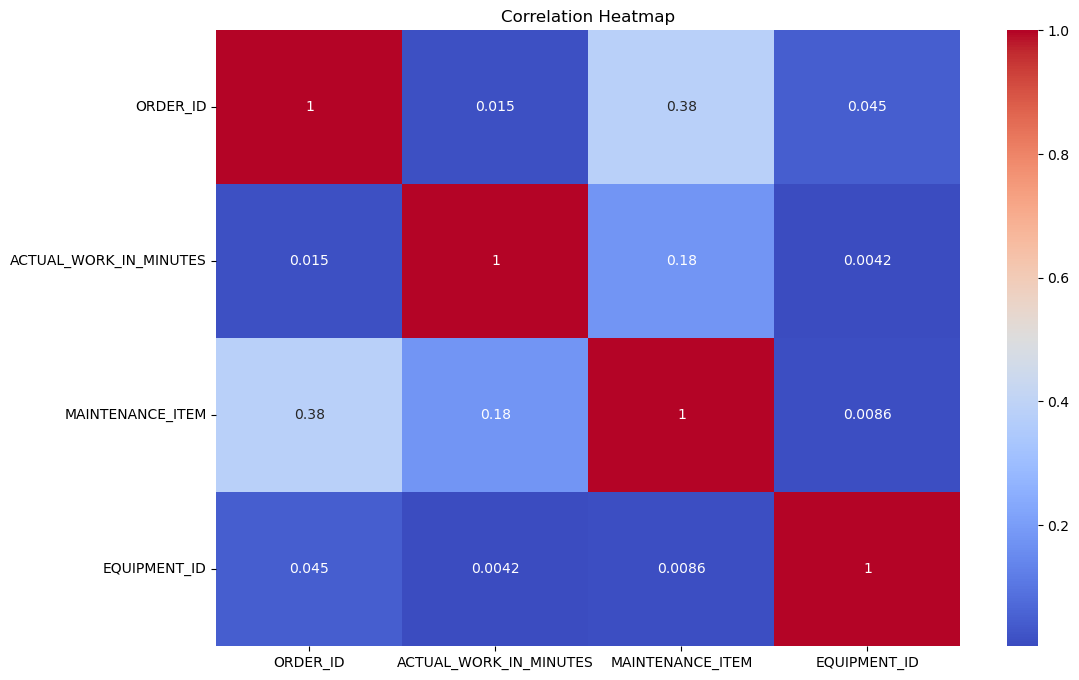

In [9]:
numeric_data = iwc_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap reveals several key insights from the data. The correlation between 'ORDER_ID' and 'MAINTENANCE_ITEM' is 0.38, indicating a moderate relationship between specific orders and the types of maintenance performed. This suggests that certain maintenance tasks are more likely to occur with particular orders. The relationship between 'ACTUAL_WORK_IN_MINUTES' and 'MAINTENANCE_ITEM' is weak (0.18), suggesting that the duration of maintenance work does not significantly vary with the type of maintenance item. Additionally, the near-zero correlation between 'ACTUAL_WORK_IN_MINUTES' and 'EQUIPMENT_ID' (0.0042) indicates that the actual work duration is not strongly influenced by the equipment involved. Similarly, 'EQUIPMENT_ID' shows minimal correlation with other variables, pointing to the possibility that the equipment type does not have a substantial effect on maintenance time or order patterns in this dataset.

### Distribution of Actual work time in minutes <a id = 'act'></a>

In [10]:
print(f"Minimum: {iwc_data['ACTUAL_WORK_IN_MINUTES'].min()}")
print(f"Medium: {iwc_data['ACTUAL_WORK_IN_MINUTES'].median()}")
print(f"Average: {iwc_data['ACTUAL_WORK_IN_MINUTES'].mean()}")
print(f"Maximum: {iwc_data['ACTUAL_WORK_IN_MINUTES'].max()}")

Minimum: 0.0
Medium: 48.0
Average: 88.62968378660146
Maximum: 330184.8


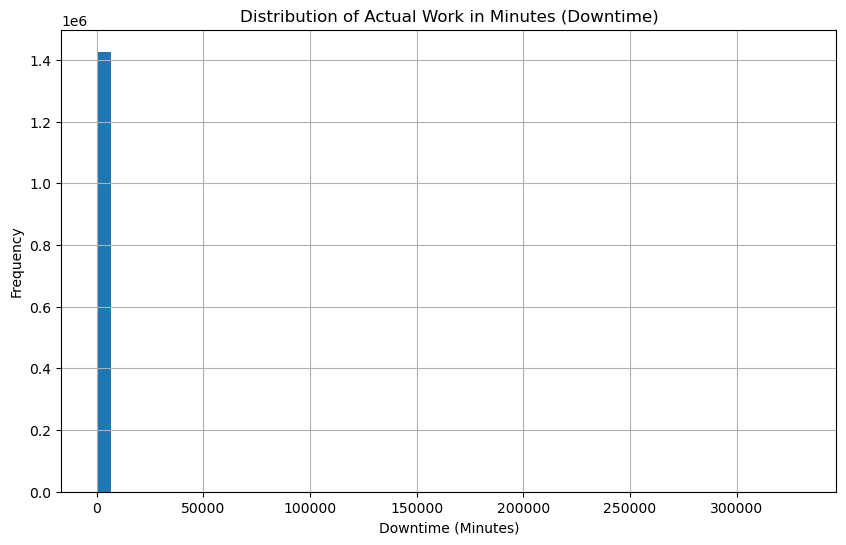

In [11]:
# Plot the distribution of actual work in minutes
plt.figure(figsize=(10, 6)) 
iwc_data['ACTUAL_WORK_IN_MINUTES'].hist(bins=50) 
plt.title('Distribution of Actual Work in Minutes (Downtime)') 
plt.xlabel('Downtime (Minutes)') 
plt.ylabel('Frequency') 
plt.show()

The actual work time distribution is skewed, with the median at 48 minutes indicating that most maintenance tasks are completed relatively quickly. However, the average is much higher at 88.63 minutes, suggesting that a small number of very long tasks are pulling the mean upward. The histogram confirms this skew, as most tasks cluster around shorter durations, while a few outliers with extreme values significantly impact the average, making the median a better measure of typical work time.

### Actual work in Minutes by Plant ID <a id = 'plant'></a>

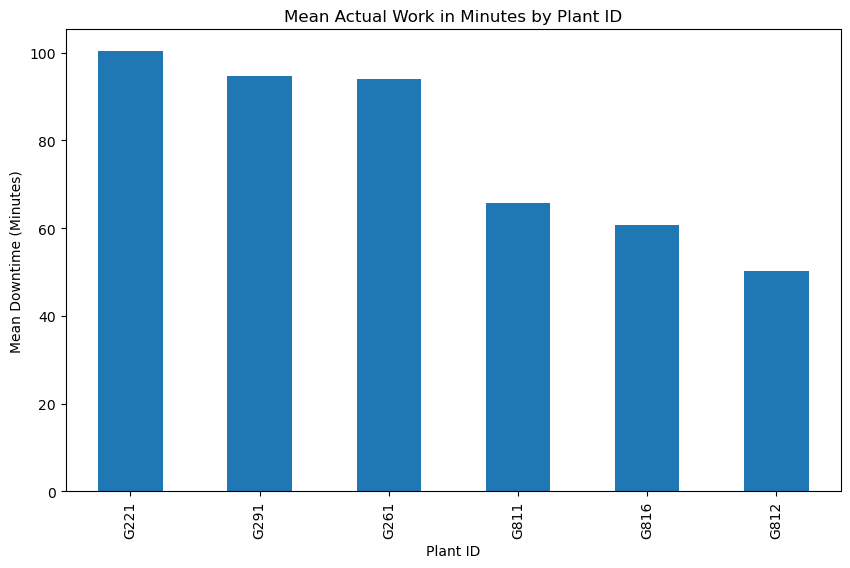

In [12]:
grouped_data_plant = iwc_data.groupby('PLANT_ID')['ACTUAL_WORK_IN_MINUTES'].mean()

# Sort values to make the plot more readable
grouped_data_plant = grouped_data_plant.sort_values(ascending=False)

# Plot the mean downtime by plant
plt.figure(figsize=(10,6))
grouped_data_plant.plot(kind='bar')
plt.title('Mean Actual Work in Minutes by Plant ID')
plt.ylabel('Mean Downtime (Minutes)')
plt.xlabel('Plant ID')
plt.xticks(rotation=90)  # Rotate plant IDs for better readability
plt.show()

The bar plot showing the mean downtime (Actual Work in Minutes) by Plant ID provides a straightforward comparison across different plants. The data is sorted in descending order, emphasizing the plants with the highest average downtime. Notably, plant G221 (Suzuka) leads, followed closely by G291 (Monza) and G261 (Silverstone), with only a slight difference between the latter two. The plant with the lowest average downtime is G812 (Roma).

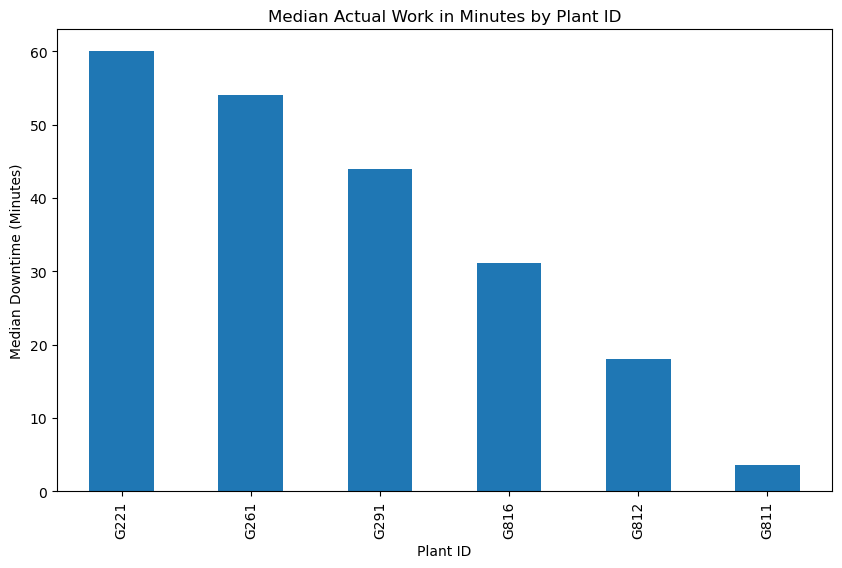

In [13]:
# Group by Plant ID and calculate median downtime
grouped_data_plant_median = iwc_data.groupby('PLANT_ID')['ACTUAL_WORK_IN_MINUTES'].median()

# Sort values to make the plot more readable
grouped_data_plant_median = grouped_data_plant_median.sort_values(ascending=False)

# Plot the median downtime by plant
plt.figure(figsize=(10,6))
grouped_data_plant_median.plot(kind='bar')
plt.title('Median Actual Work in Minutes by Plant ID')
plt.ylabel('Median Downtime (Minutes)')
plt.xlabel('Plant ID')
plt.xticks(rotation=90)
plt.show()

The code calculates the median downtime (Actual Work in Minutes) by plant and visualizes it with a bar plot, sorted in descending order to emphasize plants with the highest median downtime. Similar to the mean downtime analysis, G221 (Suzuka) still leads with the highest downtime, though there is a slight shift in the following plants. G261 (Silverstone) now surpasses G291 (Monza), which was ranked higher in the mean downtime graph, showing a change in the distribution. The plant with the lowest median downtime is G811 (Monaco), while G812 (Roma) has moved up one position, no longer holding the lowest spot as it did in the mean downtime graph.

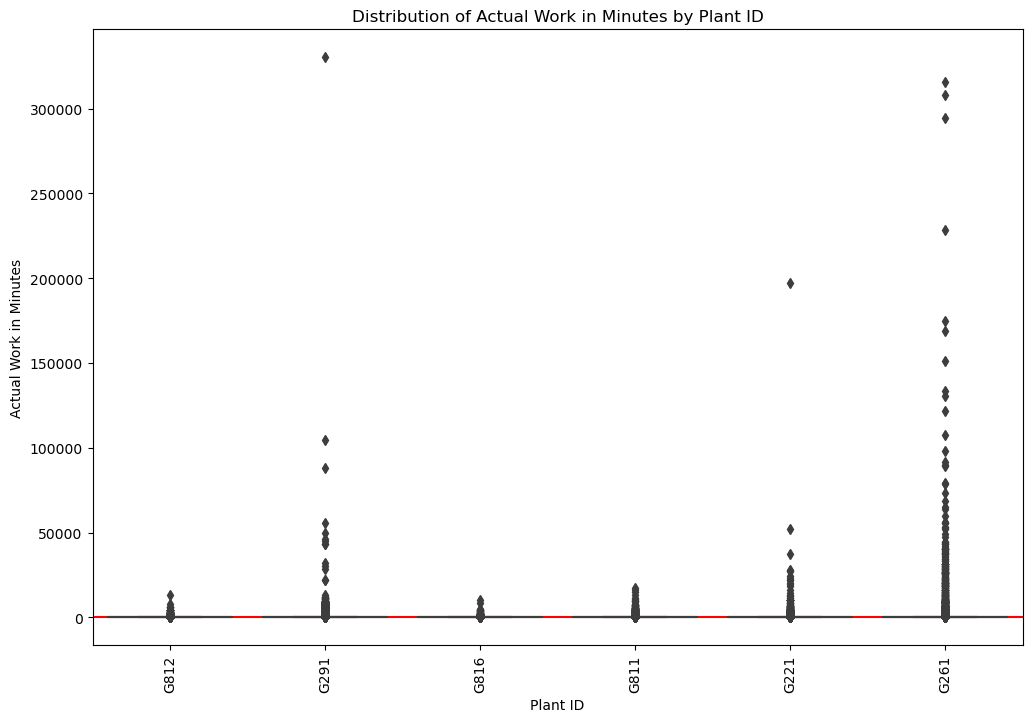

In [14]:
# Boxplot for downtime distribution by Plant ID
plt.figure(figsize=(12,8))
plt.axhline(y=48, color='r', label='Median: 48 Minutes')
sns.boxplot(x='PLANT_ID', y='ACTUAL_WORK_IN_MINUTES', data=iwc_data)
plt.title('Distribution of Actual Work in Minutes by Plant ID')
plt.xlabel('Plant ID')
plt.ylabel('Actual Work in Minutes')
plt.xticks(rotation=90)  # Rotate plant IDs for better readability
plt.show()

This box plot visualizes the distribution of actual work times across different plants, with the red line representing the median downtime of 48 minutes. Most maintenance tasks are completed in a relatively short time, but the plot reveals notable outliers, especially at plants such as Silverstone (G261), Suzuka (G221), and Monza (G291), where certain tasks take considerably longer. These outliers have a substantial impact on the data, causing the mean downtime to be much higher than the median.

### Actual work in Minutes by Functional Location <a id = 'loc'></a>

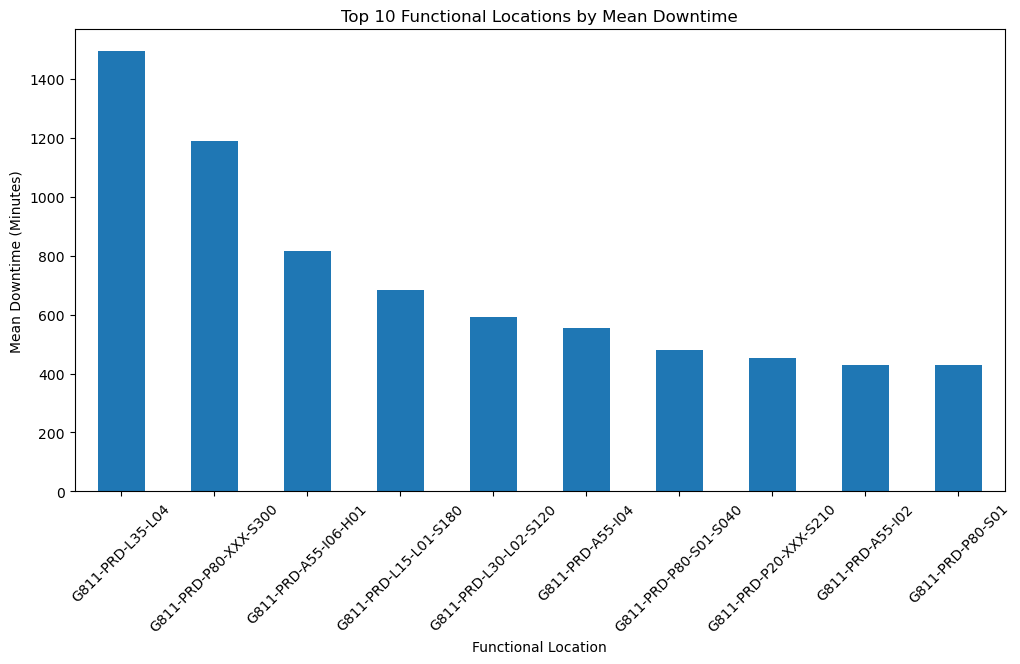

In [15]:
# Group by functional location and calculate mean downtime
grouped_functional_loc = iwc_data.groupby('FUNCTIONAL_LOC')['ACTUAL_WORK_IN_MINUTES'].mean().sort_values(ascending=False).head(10)

# Plot top functional locations by mean downtime
plt.figure(figsize=(12, 6))
grouped_functional_loc.plot(kind='bar')
plt.title('Top 10 Functional Locations by Mean Downtime')
plt.ylabel('Mean Downtime (Minutes)')
plt.xlabel('Functional Location')
plt.xticks(rotation=45)
plt.show()

This code calculates the mean downtime (Actual Work in Minutes) for each functional location and visualizes the top 10 locations with the highest average downtime using a bar plot. The functional locations are sorted in descending order to highlight those with the greatest mean downtime. Notably, G811-PRD-L35-L04 leads with downtime exceeding 1400 minutes, while G811-PRD-P80-S01 ranks last among the top 10. Interestingly, all of the top 10 functional locations are from the G811 (Monaco) plant.

### Order Description <a id = 'order'></a>

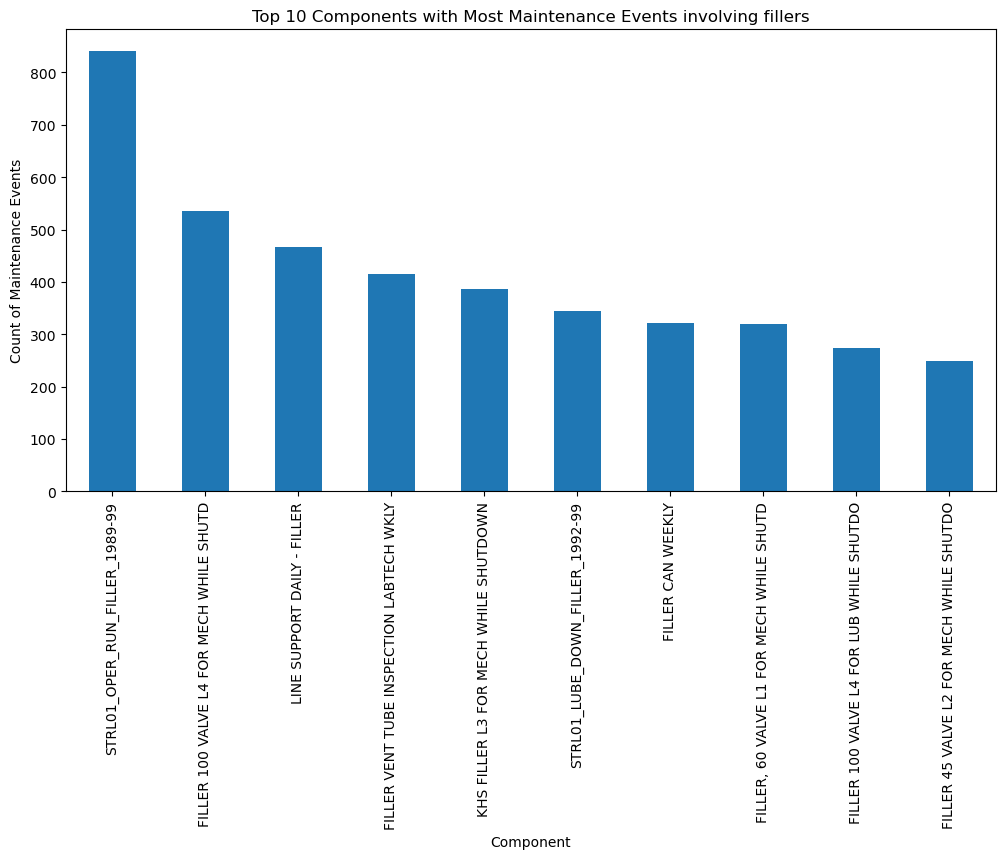

In [16]:
# Define components of interest for filtering
components_of_interest = ['filler']

# Filter the dataset for relevant components in ORDER_DESCRIPTION, excluding blank entries
filtered_data = iwc_data[iwc_data['ORDER_DESCRIPTION'].str.contains('|'.join(components_of_interest), na=False, case=False)]

# Count number of maintenance events by component
if not filtered_data.empty:  # Check if filtered data is not empty
    component_failure_count = filtered_data['ORDER_DESCRIPTION'].value_counts()

    # Plot top 10 components with the most failures
    plt.figure(figsize=(12, 6))
    component_failure_count.head(10).plot(kind='bar')
    plt.title('Top 10 Components with Most Maintenance Events involving fillers')
    plt.ylabel('Count of Maintenance Events')
    plt.xlabel('Component')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("No data found for the specified components.")

This code filters the dataset to focus on maintenance events related to the "filler" component in the ORDER_DESCRIPTION column. It excludes rows with blank or missing values in the description. Then, it counts the number of maintenance events for the "filler" component and visualizes the top 10 components with the most events using a bar plot.

## Summary <a id = 'sum'></a>

- **Functional Locations with Highest Downtime:** G811 (Monaco) has the highest average downtime, particularly in G811-PRD-L35-L04. All top 10 locations for mean downtime are from G811.
- **Maintenance Patterns by Plant:** G221 (Suzuka) has the highest average downtime, followed by G291 (Monza) and G261 (Silverstone). G812 (Roma) shows the lowest average downtime, indicating more efficient maintenance.
- **Skewed Distribution of Downtime:** While the median downtime is 48 minutes, the average is much higher at 88.63 minutes due to outliers. The longest recorded downtime was 330,184.8 minutes (around 229 days), pointing to rare but significant disruptions.
- **Plant-Specific Downtime:** Suzuka (G221) and Silverstone (G261) experience longer median downtimes, while Monaco (G811) and Roma (G812) have shorter median downtimes, suggesting more efficient operations at the latter plants.
- **Data Distribution and Outliers:** The data distribution is skewed due to extreme outliers. The longest recorded task took 330,184.8 minutes, which may indicate significant disruptions or delays in obtaining parts.